![Insper](https://github.com/danielscarvalho/Insper-DS-Dicas/blob/master/Insper-Logo.png?raw=true)

# Projeto Integrador - 1º Trimestre

## O projeto

- O projeto integrador consiste em construir um pipeline completo de préprocessamento de dados e construção de modelo preditivo de classificação, voltado par predizer se uma empresa irá deixar de operar em até dois an.o A base de dados que será utilizada foi coletada e curada pela Bisnode, uma empresa europeia do ramo de *business information*. En terminos gerais, a base de dados tem informacao contavel assim que operacional para o periodo 20025 ate 2016.

## Quem é a Bisnode? [»](https://www.dnb.com/en-gb/)

- A Bisnode era uma empresa que oferecia suporte à decisão na forma de negócios digitais , marketing e informações de crédito . Fundada em 1989, a Bisnode era detida em 70 por cento pela Ratos e 30 por cento pela Bonnier . Em 2020 , Dun e Bradstreet adquiriram a Bisnode por US$ 811,60 milhões. A Bisnode está presente em 19 países europeus e tem sua sede em Estocolmo , Suécia . A receita da empresa é de pouco menos de 4 bilhões de dólares.
    https://en.wikipedia.org/wiki/Bisnode

## Objetivo e Processo
a) O objetivo final é predizer a proabilidade que uma empresa irá deixar de operar em 02 anos, para isso usaremos: 

- Se X = Ano e em X+2 não houve atividade de venda, então a hyotesee que a empresa deixou de operar (" resposta variveil - llamada de "target" neste arquivo).
- O problema e de clasificacao.
  
<img src="IM01_comprar-empresa-falida.jpg" width="300">
 
b) Processo:        
- Criar o Plano de Trabalho para tratamento do Data Frame (DF) em linguagem Python;
- Criar o Plano de Trabalho para modelagem dos modelos de teste em linguagem R.


# Pré-Processamento em Python
## Importando as Bibliotecas:

- No início de cada sessão de análise de dados, é sempre importante fazer o carregamento das bíbliotecas que serão necessárias para a execução dos comandos que serão usados. As bibliotecas são conjuntos de comandos, que vão além dos comandos originais da linguagem, criadas por desenvolvedores para facilitar a vida do programador, economizando tempo e deixando o seu trabalho mais limpo e inteligível.

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from matplotlib.ticker import FuncFormatter

%matplotlib inline

### Manipulando os dados:

- Abaixo temos uma listagem dos passos que julgamos necessários seguir para termos ao final, um novo DF, que será o objeto das nossas análises exploratórias em R (segunda parte do projeto):

1) Análise do DF (gerando e analisando informações);

1) Verificando valores duplicados;

1) Verificando os dados faltantes e suas porcentagens; 
  
3) Removendo as colunas com dados faltantes e colunas com informações não significativas para o estudo central;

1) Removendo os dados do ano de 2016 (resultado da análise do DF);

1) Criar a coluna de objeto da predição do estudo seguindo a fórmula mencionada no item 1.2 (a);

1) Criar a coluna de idade das empresas;

1) Filtrar o ano de 2012 (mais à frente você entederá porque 2012);

1) Transformar dados negativos da coluna 'sales' em 0;

1) Verificar assimetria dos dados 'sales' e transformar em log para facilitar a análise;

1) Filtrar os dados para empresas com "vendas abaixo de 10 milhões e acima de 1,000 euros";

1) Criar arquivo com o novo DF;

**Cansou? Calma, isso é só o começo! Vai tomar um café e volta.**

<img src="IM02_cafe.jpeg" width="300">
  



## Carregando o Data Frame Original

- Aqui é o início de tudo, onde carregamos o arquvio recebido como nossa base de dados inicial ou o nosso "Querido e idolatrado...Bob Pai", ops Data Frame.

<img src="IM04_bob.jpg" width="150">


- Abaixo indicamos o nome para o DF criando um novo objeto baseado no original:

In [16]:
df = pd.read_csv('cs_bisnode_panel.csv')

- É muito importante neste primeiro momento uma análise inicial com uma pequena visualização do o nosso DF. Aqui de cara já iremos notar infomações como o nome e a quantidade das colunas, e como de alguma forma os dados estão dispostos. 🧐

In [3]:
df.head()

,comp_id,begin,end,COGS,amort,curr_assets,curr_liab,extra_exp,extra_inc,extra_profit_loss,...,gender,origin,nace_main,ind2,ind,urban_m,region_m,founded_date,exit_date,labor_avg
0,1001034.0,2005-01-01,2005-12-31,NaN,692.592590,7266.666504,7574.074219,0.0,0.0,0.0,...,mix,Domestic,5630.0,56.0,3.0,1,Central,1990-11-19,NaN,NaN
1,1001034.0,2006-01-01,2006-12-31,NaN,603.703674,13122.222656,12211.111328,0.0,0.0,0.0,...,mix,Domestic,5630.0,56.0,3.0,1,Central,1990-11-19,NaN,NaN
2,1001034.0,2007-01-01,2007-12-31,NaN,425.925934,8196.295898,7800.000000,0.0,0.0,0.0,...,mix,Domestic,5630.0,56.0,3.0,1,Central,1990-11-19,NaN,NaN
3,1001034.0,2008-01-01,2008-12-31,NaN,300.000000,8485.185547,7781.481445,0.0,0.0,0.0,...,mix,Domestic,5630.0,56.0,3.0,1,Central,1990-11-19,NaN,NaN
4,1001034.0,2009-01-01,2009-12-31,NaN,207.407410,5137.037109,15300.000000,0.0,0.0,0.0,...,mix,Domestic,5630.0,56.0,3.0,1,Central,1990-11-19,NaN,0.083333


## Analisando e Investigando o Data Frame

- Com o DF carregado e feita a primeira investigação, começamos a análise de fato, observando tipos de dados, numero de linhas, caracteristicas de algumas colunas, etc:

In [21]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287829 entries, 0 to 287828
Data columns (total 48 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   comp_id               287829 non-null  float64
 1   begin                 287829 non-null  object 
 2   end                   287829 non-null  object 
 3   COGS                  18257 non-null   float64
 4   amort                 279789 non-null  float64
 5   curr_assets           287698 non-null  float64
 6   curr_liab             287698 non-null  float64
 7   extra_exp             269300 non-null  float64
 8   extra_inc             269300 non-null  float64
 9   extra_profit_loss     270626 non-null  float64
 10  finished_prod         17485 non-null   float64
 11  fixed_assets          287698 non-null  float64
 12  inc_bef_tax           280392 non-null  float64
 13  intang_assets         287689 non-null  float64
 14  inventories           287698 non-null  float64
 15  

- **Temos algumas informações bem inportantes aqui, como:**
1. Quantidades de Colunas: 48;
1. Quantidade de Linhas: 216.778;
1. Tipo dos dados: 41 (numéricos) e 7 (objetos);
1. Nome das Colunas.

**Obs:** ***Não esqueçam para o Phyton o '0' conta!***

<img src="IM03_zero.jpg" width="300">

## Verificação de dados faltantes

- É importantíssmo num contexto geral, analisar se existem colunas com dados faltantes e essa proporação em relação ao todo, uma vez que isso pode indicar uma coluna que não será util para o trabalho como um todo, ou se precisamos tratar esses dados que não existem. Essa falta de dados é conhecida como **Missings**.

In [5]:
print (df.isnull().sum())

comp_id                      0
begin                        0
end                          0
COGS                    269572
amort                     8040
curr_assets                131
curr_liab                  131
extra_exp                18529
extra_inc                18529
extra_profit_loss        17203
finished_prod           270344
fixed_assets               131
inc_bef_tax               7437
intang_assets              140
inventories                131
liq_assets                 131
material_exp              8040
net_dom_sales           269572
net_exp_sales           269572
personnel_exp             8040
profit_loss_year          9884
sales                     7437
share_eq                   131
subscribed_cap             131
tang_assets               1470
wages                   269846
D                       287829
balsheet_flag                0
balsheet_length              0
balsheet_notfullyear         0
year                         0
founded_year             56457
exit_yea

- Para essa análise podemos optar também por trazer a porcentagem desses **Missings**, uma maneira mais fácil de quantificar esses dados.

In [6]:
missing_percent = df.isnull().mean().sort_values(ascending=False) * 100
missing_df = missing_percent[missing_percent > 0].round(2).to_frame(name='% Missing')

print("\n🔍 Percentual de Dados Ausentes por Coluna:\n")
print(missing_df)


🔍 Percentual de Dados Ausentes por Coluna:

                   % Missing
D                     100.00
finished_prod          93.93
wages                  93.75
COGS                   93.66
net_exp_sales          93.66
net_dom_sales          93.66
exit_year              86.50
exit_date              80.48
labor_avg              50.91
birth_year             38.85
founded_year           19.61
origin                 19.60
female                 19.60
ceo_count              19.60
foreign                19.60
inoffice_days          19.60
gender                 19.60
extra_exp               6.44
extra_inc               6.44
extra_profit_loss       5.98
profit_loss_year        3.43
ind                     3.39
material_exp            2.79
personnel_exp           2.79
amort                   2.79
sales                   2.58
inc_bef_tax             2.58
tang_assets             0.51
nace_main               0.36
ind2                    0.36
region_m                0.29
intang_assets           0.0

- E como a vida é mais fácil quando vemos as coisas 🤣, podemos fazer um gráfico desses dados:

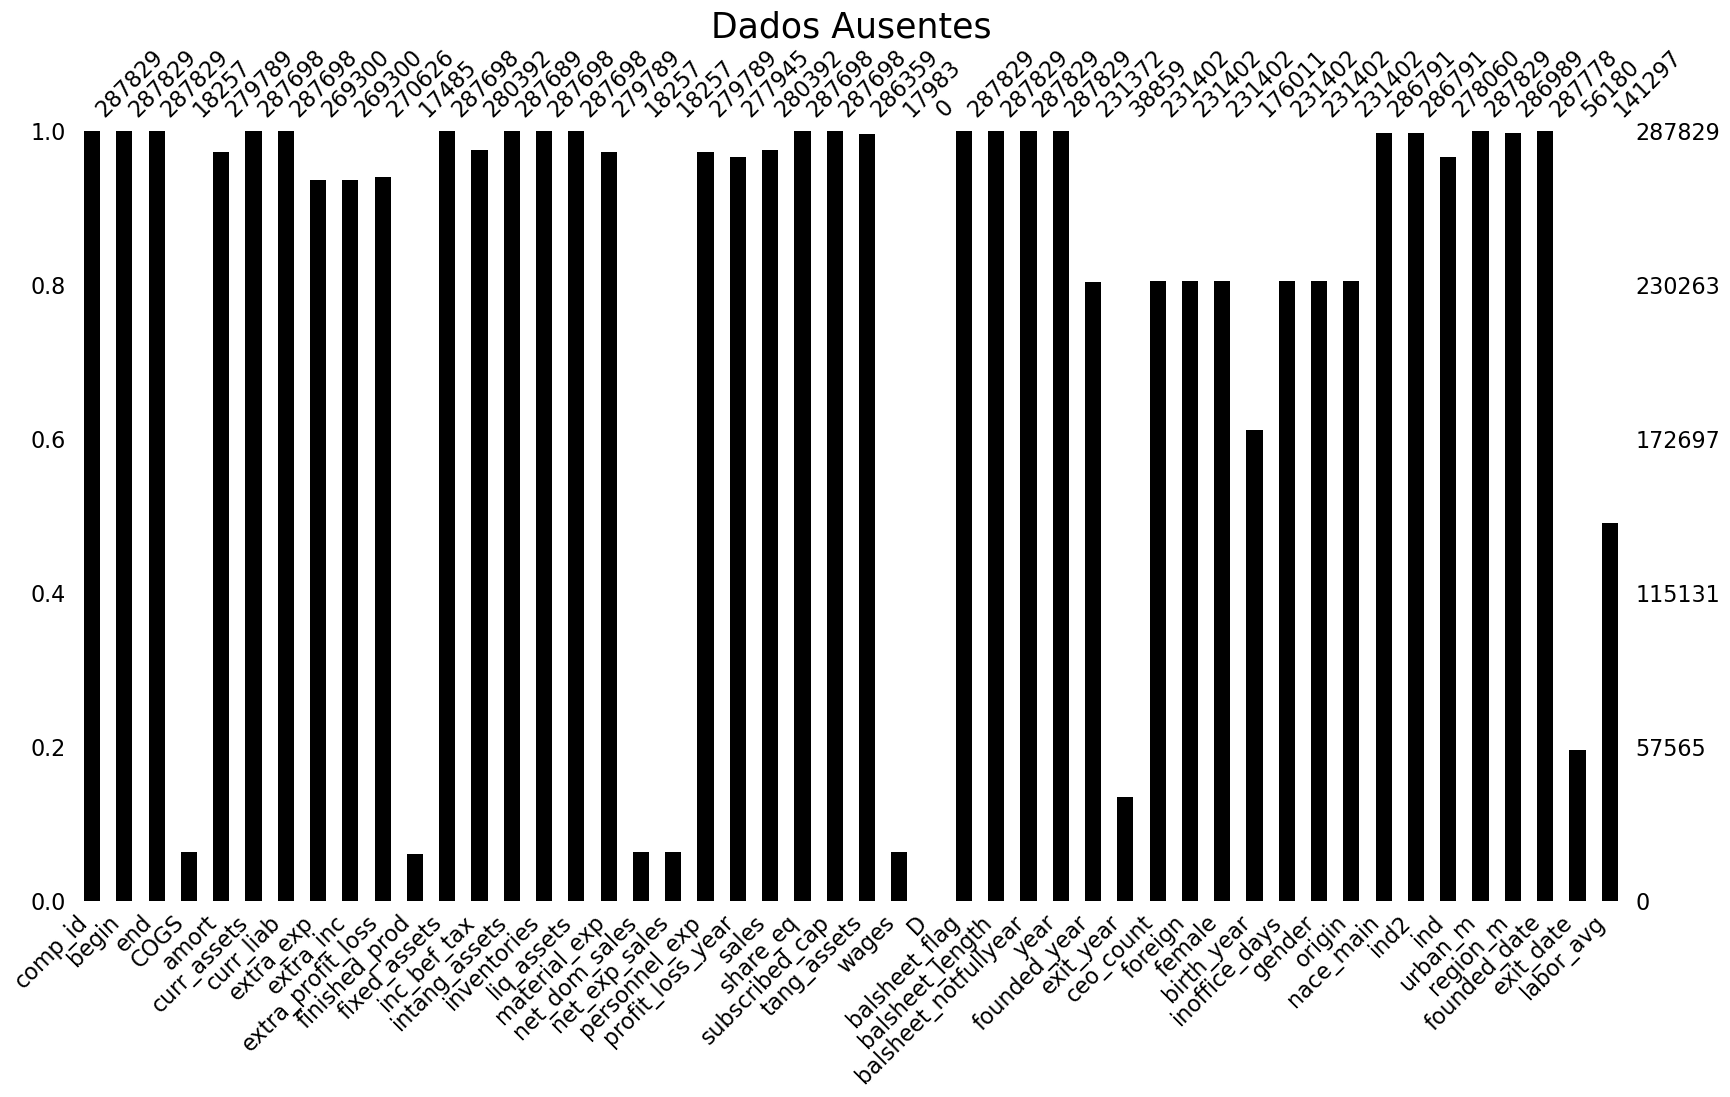

In [74]:
msno.bar(df, color='black', figsize=(20, 10))
plt.title("Dados Ausentes", size = 25)
plt.show()

 - Dessa forma fica muito mais claro as colunas que precisarão de mais atenção nessa fase de escolha de dados.

## Dados Duplicados

- Da mesma forma que valores faltantes podem interferirir em nossa análise, os dados duplicados também. Esses dados podem distorcer a análise. É preciso identificar e remover registros duplicados para garantir que cada observação represente uma entrada única no seu DF.

In [25]:
duplicados = df.duplicated()
print('\nQuantidade de dados duplicados:\n')
print(duplicados.sum())


Quantidade de dados duplicados:

0


<img src="IM05_gemeas.jpg" width="300">

## Retirando as colunas com dados faltantes

- Após a análise dos dados e porcetagens acima, decidimos quais dados não tinham relação com o nosso objeto de estudo e assim seguimos para retirar algumas colunas de nosso DF. Essa ação não precisa ser permanente, uma vez que após a análise final pode-se preceber que alguma coluna retirada poderia ser útil para a análise, dessa forma, retorne e altere o DF para uma nova análise. Essa é a função da análise de dados.

- Dentro dessas colunas estão:
  1. Colunas com dados com mesma função, como por exemplo datas;
  2. Dados simplesmnete que entedemos que não são uteis, como quantidade de funcionários, aniversário dos CEO's, genero dos funcionários, etc;
  3. Colunas simplesmente vazias, sem dados;
 
**OBS:** É importante observar que aqui iremos criar um novo objeto e esse será o nosso DF daqui em diante, fazemos isso como uma boa prática, pois como disse antes, podemos revisitar os dados anteriores e dessa forma reservamos as alterações feitas até aqui.

In [17]:
df_novo = df.drop(['COGS', 'finished_prod', 'net_dom_sales', 'net_exp_sales', 'wages', 'D', 'begin', 'end',
    'amort', 'curr_assets', 'extra_exp', 'extra_inc', 'extra_profit_loss', 'fixed_assets', 'inc_bef_tax', 'intang_assets', 'inventories',
    'material_exp', 'personnel_exp', 'share_eq', 'subscribed_cap', 'balsheet_flag', 'balsheet_length','exit_year', 'ceo_count', 'foreign', 
    'female', 'birth_year','inoffice_days', 'gender', 'origin', 'nace_main', 'exit_date', 'labor_avg', 'founded_date', 'ind2', 'ind',
    'urban_m', 'region_m'], axis=1)

- Como indicado no início do nosso trabalho é importante verificar brevemente o novo DF para ter certeza que as alterações foram feitas.

In [4]:
df_novo.head()

,comp_id,curr_liab,liq_assets,profit_loss_year,sales,tang_assets,balsheet_notfullyear,year,founded_year
0,1001034.0,7574.074219,2911.111084,62.962963,62751.851562,1229.629639,0,2005,1990.0
1,1001034.0,12211.111328,5896.296387,755.555542,64625.925781,725.925903,0,2006,1990.0
2,1001034.0,7800.000000,177.777771,0.000000,65100.000000,1322.222168,0,2007,1990.0
3,1001034.0,7781.481445,1392.592651,0.000000,78085.187500,1022.222229,0,2008,1990.0
4,1001034.0,15300.000000,11.111111,-11074.074219,45388.890625,814.814819,0,2009,1990.0


In [18]:
df_novo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287829 entries, 0 to 287828
Data columns (total 9 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   comp_id               287829 non-null  float64
 1   curr_liab             287698 non-null  float64
 2   liq_assets            287698 non-null  float64
 3   profit_loss_year      277945 non-null  float64
 4   sales                 280392 non-null  float64
 5   tang_assets           286359 non-null  float64
 6   balsheet_notfullyear  287829 non-null  int64  
 7   year                  287829 non-null  int64  
 8   founded_year          231372 non-null  float64
dtypes: float64(7), int64(2)
memory usage: 19.8 MB


## Remoção do ano de 2016

- Foi necessário remover o ano de 2016 porque a definição da variável target depende de olhar dois períodos à frente para verificar se a empresa deixou de operar. Como não há dados posteriores a 2016, não seria possível calcular o valor futuro (por exemplo, vendas em 2018) para os registros desse ano. Manter o ano de 2016 resultaria em valores ausentes na coluna auxiliar "sales_future", que ainda iremos criar, o que prejudicaria a criação e a integridade da variável target para o modelo preditivo.

In [19]:
df_novo = df_novo[df_novo['year'] != 2016]

## Criando o objeto de predição

<img src="IM06_target.webp" width="800">

A variável target é o “alvo” 🔝 que queremos prever no modelo preditivo. Ela é binária (assumindo os valores 0 ou 1) e foi construída com base em um critério temporal aplicado às vendas das empresas. 

Ou seja:


**A)** ***target = 1:** Indica que a empresa estava ativa (com vendas > 0) no período corrente, mas que dois períodos à frente apresentou vendas zero, sugerindo que ela deixou de operar.*

**B)** ***target = 0:** Indica que a empresa continuou operando, ou seja, mesmo que as vendas possam variar, ela não atende ao critério de ter vendas zero após dois períodos.*

A criação da variável target envolve dois passos:

**A)** ***Criação de uma coluna auxiliar ("sales_future"):*** Para cada empresa, essa coluna armazena as vendas que ocorrerão dois períodos depois. Essa operação permite "olhar para o futuro" de cada empresa e capturar as vendas do período X+2.

**B)** ***Definição da variável target com base no critério:*** Em seguida, aplicamos a regra que define target como 1 se a empresa tinha vendas positivas e, dois períodos depois, passou a ter vendas zero. Se a condição não for satisfeita, target assume o valor 0 A variavel target existe no 2012.

Em resumo, a variável target é fundamental para nosso problema, pois ela permite que o modelo aprenda a identificar padrões que antecedem o término das operações de uma empresa. Essa abordagem também nos ajuda a mensurar o desempenho preditivo dos diferentes modelos que serão testados, utilizando métricas como acurácia, AUC, entre outras.


In [20]:
df_preditora = df_novo.copy() #criando uma cópia para não comprometer o Df anterior até o momento

df_preditora['sales_future'] = df_preditora.groupby('comp_id')['sales'].shift(-2)
df_preditora['target'] = np.where((df_preditora['sales'] > 0) & (df_preditora['sales_future'] == 0), 1, 0)

df_preditora.head(21)

,comp_id,curr_liab,liq_assets,profit_loss_year,sales,tang_assets,balsheet_notfullyear,year,founded_year,sales_future,target
0,1001034.0,7574.074219,2911.111084,62.962963,62751.851562,1229.629639,0,2005,1990.0,65100.000000,0
1,1001034.0,12211.111328,5896.296387,755.555542,64625.925781,725.925903,0,2006,1990.0,78085.187500,0
2,1001034.0,7800.000000,177.777771,0.000000,65100.000000,1322.222168,0,2007,1990.0,45388.890625,0
3,1001034.0,7781.481445,1392.592651,0.000000,78085.187500,1022.222229,0,2008,1990.0,9929.629883,0
4,1001034.0,15300.000000,11.111111,-11074.074219,45388.890625,814.814819,0,2009,1990.0,0.000000,1
5,1001034.0,19629.628906,192.592590,-7548.147949,9929.629883,637.037048,0,2010,1990.0,0.000000,1
6,1001034.0,22555.554688,1633.333374,-1570.370361,0.000000,481.481476,0,2011,1990.0,0.000000,0
7,1001034.0,21429.628906,25.925926,-2474.073975,0.000000,340.740753,0,2012,1990.0,0.000000,0
8,1001034.0,21851.851562,37.037037,-633.333313,0.000000,200.000000,0,2013,1990.0,0.000000,0
9,1001034.0,22340.740234,40.740742,-448.148163,0.000000,170.370377,0,2014,1990.0,NaN,0


**OBS:** Remoção da coluna auxiliar 'sales_future' com a intenção de evitar poluir os dados de análise futura:

In [21]:
df_preditora.drop(columns='sales_future', inplace=True)

In [48]:
df_preditora.head()

,comp_id,curr_liab,liq_assets,profit_loss_year,sales,tang_assets,balsheet_notfullyear,year,founded_year,target
0,1001034.0,7574.074219,2911.111084,62.962963,62751.851562,1229.629639,0,2005,1990.0,0
1,1001034.0,12211.111328,5896.296387,755.555542,64625.925781,725.925903,0,2006,1990.0,0
2,1001034.0,7800.000000,177.777771,0.000000,65100.000000,1322.222168,0,2007,1990.0,0
3,1001034.0,7781.481445,1392.592651,0.000000,78085.187500,1022.222229,0,2008,1990.0,0
4,1001034.0,15300.000000,11.111111,-11074.074219,45388.890625,814.814819,0,2009,1990.0,1


## Filtro do ano de 2012
- O filtro pelo ano de 2012 foi definido para criar uma base de dados homogênea e consistente para a análise. Isso significa que, ao trabalhar apenas com as empresas de 2012, garantimos que as observações sejam provenientes do mesmo contexto temporal, evitando misturar dados de períodos com cenários econômicos ou regulatórios distintos. Além disso, esse filtro facilita a comparação dos dados futuros (no caso, as vendas dois períodos à frente) para a criação da variável target, pois os registros estarão todos inseridos na mesma janela de tempo. Essa estratégia ajuda a reduzir variabilidades externas e torna o modelo mais robusto:

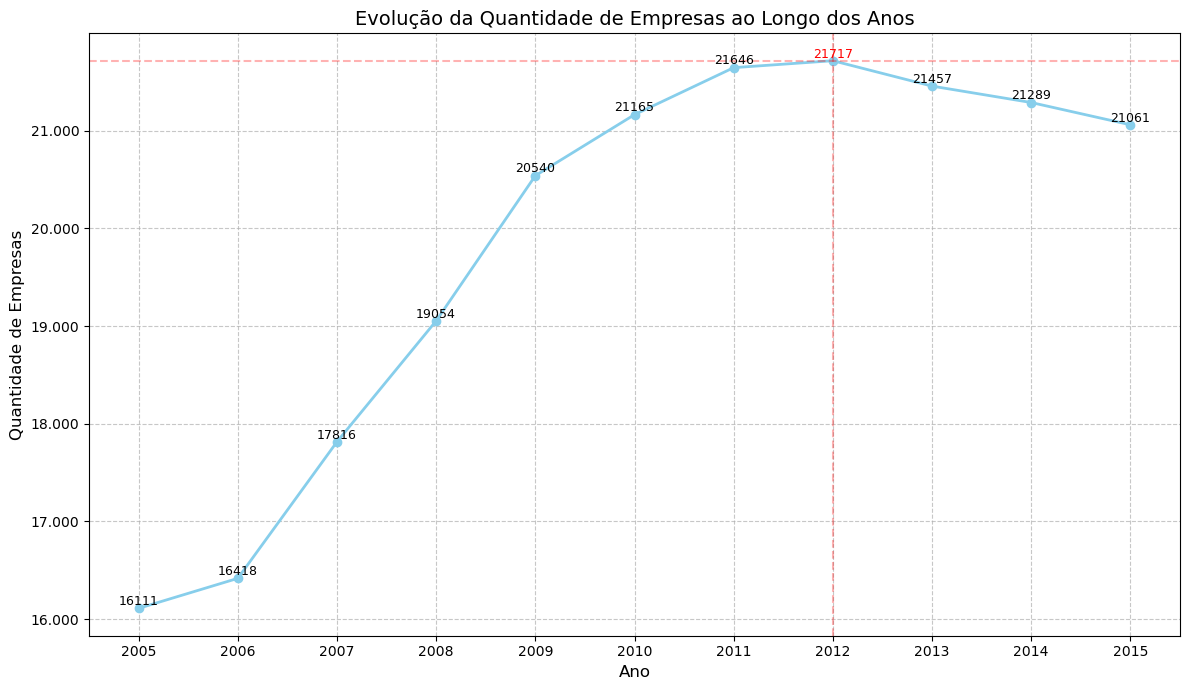

In [27]:
from matplotlib.ticker import FuncFormatter

# Função para formatar números com pontos
def formata_com_pontos(x, _):
    return f'{int(x):,}'.replace(',', '.')


# df_agrupado = df_new.groupby('year')['comp_id'].count().reset_index()
# Para exemplo:
df_agrupado = df_preditora.groupby('year')['comp_id'].count().reset_index()

anos = df_agrupado['year']
quantidade = df_agrupado['comp_id']

plt.figure(figsize=(12, 7))  # Aumentando um pouco a figura para melhor visualização

# Gráfico de linhas
plt.plot(anos, quantidade, marker='o', linestyle='-', color='skyblue', linewidth=2)

# Adicionar os valores acima de cada ponto
for ano, valor in zip(anos, quantidade):
    if ano == 2012:
        plt.text(ano, valor + 2, str(valor), ha='center', va='bottom', fontsize=9, color='red')
    else:
        plt.text(ano, valor + 2, str(valor), ha='center', va='bottom', fontsize=9, color='black')

# Adicionar linha vermelha quase opaca marcando o ano de 2012
plt.axvline(x=2012, color='red', linestyle='--', alpha=0.3)  # Linha vertical
plt.axhline(y=quantidade[anos == 2012].values[0], color='red', linestyle='--', alpha=0.3)  # Linha horizontal

# Adicionar a grade
plt.grid(True, linestyle='--', alpha=0.7)
plt.gca().yaxis.set_major_formatter(FuncFormatter(formata_com_pontos))
plt.xlabel("Ano", fontsize=12)
plt.ylabel("Quantidade de Empresas", fontsize=12)
plt.title("Evolução da Quantidade de Empresas ao Longo dos Anos", fontsize=14)
plt.xticks(anos)
plt.tight_layout()
plt.show()


In [26]:
df_years = df_preditora # criação de um novo objeto para armazenar os dados de anos para uma próxima análise.

In [8]:
df_preditora = df_preditora[df_preditora['year'] == 2012]

In [50]:
print(df_preditora['year'])

7         2012
14        2012
23        2012
35        2012
48        2012
          ... 
287779    2012
287790    2012
287798    2012
287814    2012
287825    2012
Name: year, Length: 28469, dtype: int64


<img src="IM19_RGRAFICO01.jpg" width="800">

## Retirando valores negativos de "Sales"

- Valores negativos na coluna "sales" não fazem sentido no contexto de vendas, pois vendas representam receitas ou volumes de produtos vendidos, e normalmente esses valores devem ser iguais ou superiores a zero. A presença de números negativos pode indicar erros na coleta ou no registro dos dados, ou representar situações atípicas (como devoluções ou estornos), e se não forem tratdos podem distorcer as análises estatísticas e a performance dos modelos preditivos.

- Dessa forma ajustamos a coluna "sales" substituindo os valores negativos por 0:

In [22]:
df_preditora['sales'] = np.where(df_preditora['sales'] < 0, 0, df_preditora['sales'])

df_preditora.head()

,comp_id,curr_liab,liq_assets,profit_loss_year,sales,tang_assets,balsheet_notfullyear,year,founded_year,target
0,1001034.0,7574.074219,2911.111084,62.962963,62751.851562,1229.629639,0,2005,1990.0,0
1,1001034.0,12211.111328,5896.296387,755.555542,64625.925781,725.925903,0,2006,1990.0,0
2,1001034.0,7800.000000,177.777771,0.000000,65100.000000,1322.222168,0,2007,1990.0,0
3,1001034.0,7781.481445,1392.592651,0.000000,78085.187500,1022.222229,0,2008,1990.0,0
4,1001034.0,15300.000000,11.111111,-11074.074219,45388.890625,814.814819,0,2009,1990.0,1


## Transformando os valores em Log

- A criação da coluna logarítmica tem dois principais objetivos:

**Reduzir a assimetria dos dados:**
Muitas variáveis financeiras, como "Sales", costumam apresentar distribuições com caudas longas e uma grande variação de valores. Ao aplicar a transformação logarítmica, os valores extremos são "comprimidos". Isso faz com que a distribuição se torne mais simétrica e, em muitos casos, se aproxime de uma distribuição normal.

**Melhorar o desempenho dos modelos:**
Modelos de machine learning frequentemente se beneficiam de variáveis que tenham uma distribuição mais normal. Uma distribuição mais simétrica pode facilitar a identificação de relações lineares e reduzir o impacto de outliers, contribuindo para estimativas mais precisas.

- *Em resumo, a coluna logarítmica transforma os dados originais de "Sales" em uma escala que ajuda tanto na análise exploratória quanto na performance dos modelos preditivos.*


In [24]:
df_preditora['log_sales'] = np.log1p(df_preditora['sales'])

## Filtrando por Faturamento

- O intervalo desse filtro foi para empresas com receita acima de 1.000 euros e abaixo de 10 milhões de euros. Dess forma evitamos Outliers e garantimos uma amostra mais homogenea.
Portanto, esse filtro ajuda a focar a análise nas empresas que são mais representativas do cenário de interesse, melhorando a interpretabilidade dos resultados do modelo preditivo.

In [23]:
df_preditora = df_preditora[(df_preditora['sales'] > 1000) & (df_preditora['sales'] < 10000000)]

In [54]:
df_preditora.head(20)

,comp_id,curr_liab,liq_assets,profit_loss_year,sales,tang_assets,balsheet_notfullyear,year,founded_year,target,log_sales
14,1001541.0,1.303704e+03,9048.148438,-7722.222168,1.203704e+03,1.905667e+05,0,2012,2008.0,0,7.093989
23,1002029.0,1.204445e+05,15077.777344,9722.222656,1.136515e+06,2.345926e+04,0,2012,2006.0,0,13.943478
35,1003200.0,1.099630e+04,22.222221,-2340.740723,2.785185e+03,0.000000e+00,0,2012,2003.0,0,7.932429
56,1011889.0,1.891111e+04,131766.671875,96751.851562,4.336667e+05,9.320371e+05,0,2012,1992.0,0,12.980034
68,1014183.0,8.274074e+03,18585.185547,-2351.851807,1.297296e+05,1.182296e+05,0,2012,2001.0,0,11.773216
80,1018301.0,5.925926e+02,1314.814819,-1107.407349,6.722222e+03,5.203704e+04,0,2012,2004.0,0,8.813323
91,1022796.0,6.792593e+03,3133.333252,-1311.111084,2.609630e+04,5.133333e+03,0,2012,2001.0,0,10.169587
102,1035705.0,3.059259e+03,262.962952,-8000.000000,2.402593e+04,0.000000e+00,0,2012,2011.0,0,10.086930
113,1046213.0,1.225500e+06,3659.259277,110022.218750,5.389782e+06,1.434974e+06,0,2012,1998.0,0,15.500016
124,1056952.0,2.409630e+04,1096.296265,-11255.555664,1.296296e+03,5.851852e+02,0,2012,2007.0,1,7.168038


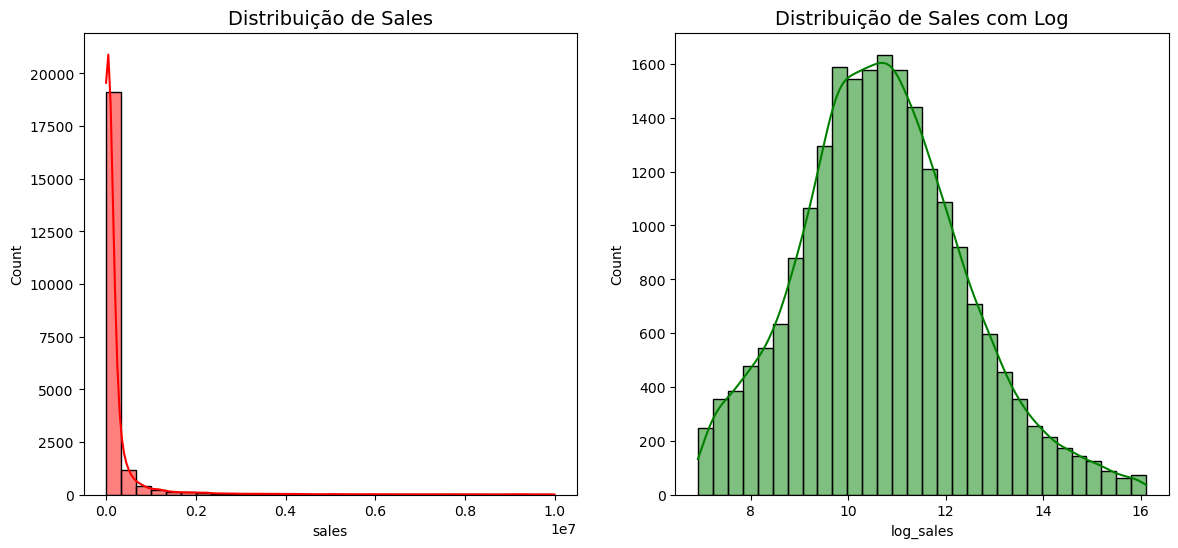

In [55]:
plt.figure(figsize=(14,6))

plt.subplot(1, 2, 1) # 1 linha, 2 colunas, 1º gráfico
sns.histplot(df_preditora['sales'], kde=True, bins=30, color = 'red')
plt.title("Distribuição de Sales", size = 14)

#plt.figure(figsize=(20,6))
plt.subplot(1, 2, 2)  # 1 linha, 2 colunas, 2º gráfico
sns.histplot(df_preditora['log_sales'], kde=True, bins=30, color = 'green')
plt.title("Distribuição de Sales com Log", size = 14)

plt.show()

## Idade das Empresas

- Calcular a idade das empresas permite incorporar ao modelo uma variável que reflete o tempo de experiência e consolidação no mercado. Empresas mais antigas podem ter maior estabilidade, processos bem estabelecidos e reputação consolidada, enquanto empresas mais jovens podem enfrentar desafios de adaptação ou, apresentar maior potencial de crescimento. Ao incluir a idade, o modelo pode identificar padrões relacionados à maturidade e risco de encerramento das operações, enriquecendo a análise preditiva sobre a continuidade ou falência das empresas.

In [25]:
df_preditora['company_age'] = df_preditora['year'] - df_preditora['founded_year']

In [57]:
print(df_preditora.info())

<class 'pandas.core.frame.DataFrame'>
Index: 21717 entries, 14 to 287814
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   comp_id               21717 non-null  float64
 1   curr_liab             21707 non-null  float64
 2   liq_assets            21707 non-null  float64
 3   profit_loss_year      21707 non-null  float64
 4   sales                 21717 non-null  float64
 5   tang_assets           21707 non-null  float64
 6   balsheet_notfullyear  21717 non-null  int64  
 7   year                  21717 non-null  int64  
 8   founded_year          19708 non-null  float64
 9   target                21717 non-null  int64  
 10  log_sales             21717 non-null  float64
 11  company_age           19708 non-null  float64
dtypes: float64(9), int64(3)
memory usage: 2.2 MB
None


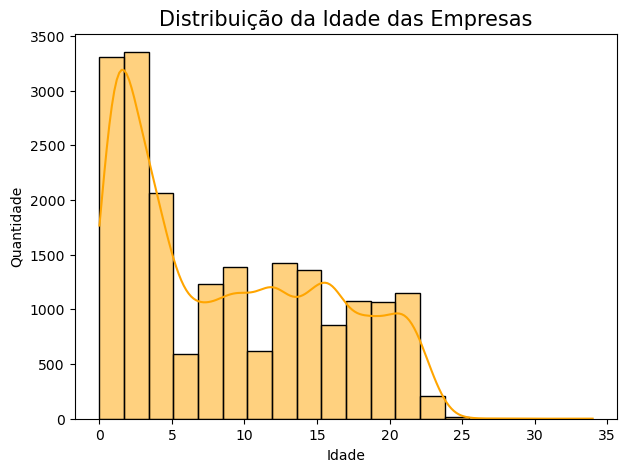

In [61]:
plt.figure(figsize=(7,5))
sns.histplot(df_preditora['company_age'], kde=True, bins=20, color = 'orange')
plt.title("Distribuição da Idade das Empresas", size = 15)
plt.xlabel("Idade")
plt.ylabel("Quantidade")

plt.show()

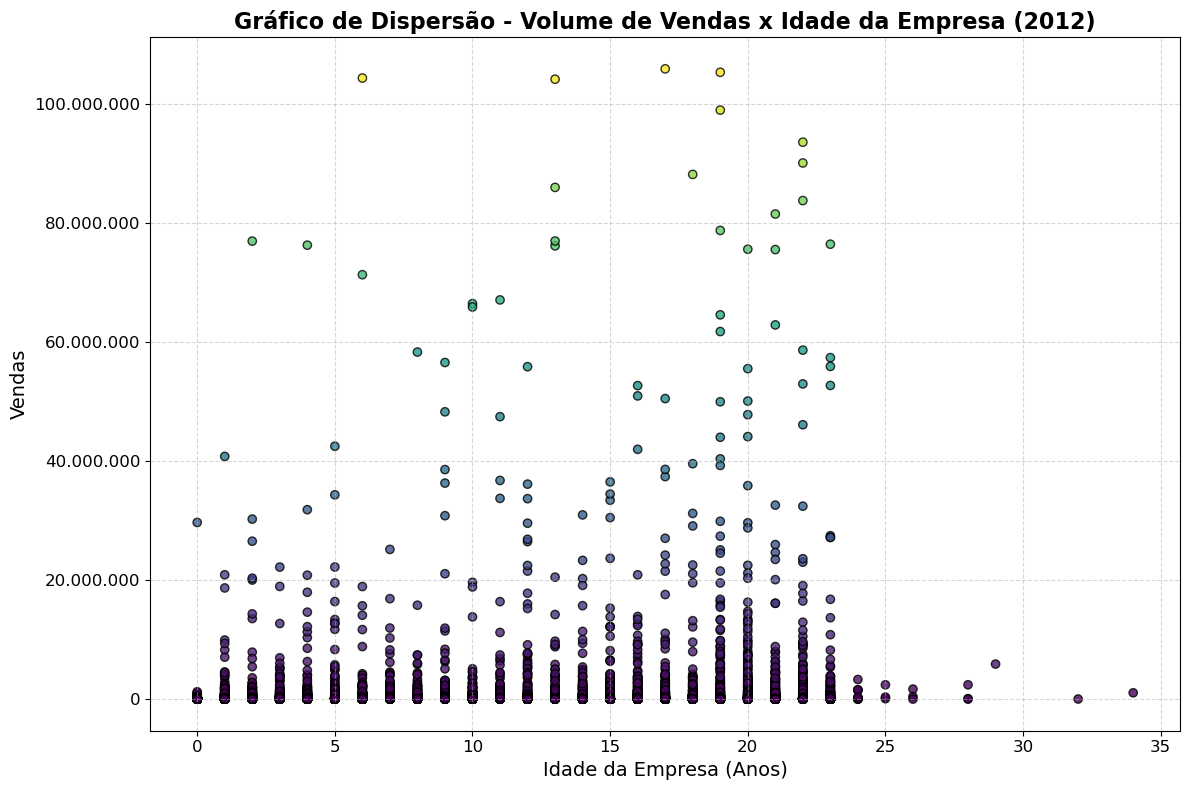

In [11]:
# Função para formatar números com pontos
def formata_com_pontos(x, _):
    return f'{int(x):,}'.replace(',', '.')

# Filtrando o DataFrame para o ano de 2012
df_2012 = df_preditora[df_preditora['year'] == 2012]

# Criando o gráfico de dispersão
fig, ax = plt.subplots(figsize=(12, 8))
scatter = ax.scatter(
    df_2012['company_age'], 
    df_2012['sales'], 
    c=df_2012['sales'], 
    cmap='viridis', 
    edgecolor='k', 
    alpha=0.8
)

# Configurando os rótulos e o título
ax.set_title('Gráfico de Dispersão - Volume de Vendas x Idade da Empresa (2012)', fontsize=16, fontweight='bold')
ax.set_xlabel('Idade da Empresa (Anos)', fontsize=14)
ax.set_ylabel('Vendas', fontsize=14)

# Removendo a barra de cores
scatter.set_clim(vmin=min(df_2012['sales']), vmax=max(df_2012['sales']))  # Ajuste do gradiente sem exibir a barra

# Formatando o eixo Y para exibir números com pontos
ax.yaxis.set_major_formatter(FuncFormatter(formata_com_pontos))

# Adicionando grade personalizada
ax.grid(True, linestyle='--', alpha=0.5)

# Melhorando a aparência geral
ax.tick_params(labelsize=12)
plt.tight_layout()

# Exibindo o gráfico
plt.show()


## Data Frame Final
- Após o filtro de faturamento chegamos ao final do tratamento do Data Frame. Dessa forma iremos converte-lo para um arquivo .csv e transferir os dados para a análise em R, onde iremos criar os modelos de predição.

In [66]:
df_preditora.to_csv("dataframe_preprocessado_250402_00.csv", index=False)

<img src="IM07_freddy.png" width="500">

# Plano de Trabalho Preliminar em R

- Aqui começamos o trabalho de criação dos modelos preditivos. Os códigos devem ser executados no RStudio ou outro programa, mas aqui eles estarão apenas como exposição.

## Importando o DF tratado no Python

- Tudo inicia novamente com a importação do arquivo .csv que salvamos no final da seção anterior. Este arquivo passará por processos parecidos de análise e investigação mas agora com a intenção de rodar o modelo preditivo para a análise do nosso objeto alvo de estudo.

In [ ]:
# Open libraries 
library(tidyverse)
library(ggplot2)
library(dplyr)
library(skimr)
library(tidyr)
library(glmnet)
library(yardstick)
library(rsample)
library(pROC)
library(randomForest)
library(xgboost)
library(survival)
library(survminer)
library(caret)
library(vip)
library(broom)
library(rmarkdown)

# Open file
df <- read.csv('dataframe_preprocessado_250402_00.csv')

## Print numbered list of column names
for (i in seq_along(colnames(df))) {
  cat(i, ":", colnames(df)[i], "\n")
}

# Count values in the 'target' column
table(df$target)

# Summarize everything
skim(df)

# Run skim and convert to a data frame
skim_table <- skim(df) %>% as.data.frame()

## Regressão Logística

- A Regressão Logística é um modelo estatístico simples, utilizado para problemas de classificação binária – no nosso caso, para prever se uma empresa deixará de operar (target = 1) ou não (target = 0);
- O modelo calcula uma combinação linear das variáveis (como vendas, idade, faturamento, etc.) multiplicadas por seus respectivos coeficientes;
- Essa combinação é transformada através de uma função logística, que converte os valores em probabilidades entre 0 e 1;
- Se a probabilidade calculada for maior 0,3, o modelo classifica a empresa como uma que provavelmente deixará de operar (target = 1) e caso contrário, irá classificar como uma que continuaráo a operar (target = 0).

In [ ]:
# Standard Logistic Regression

#Prepare data: remove ID and NAs
model_data <- df %>%
  select(-comp_id) %>%
  drop_na()

#Convert target to factor (binary classification)
model_data$target <- factor(model_data$target)
table(model_data$target)

#Split into training and test sets (80/20)
set.seed(123)
train_indices <- sample(nrow(model_data), 0.8 * nrow(model_data))
train_data <- model_data[train_indices, ]
test_data  <- model_data[-train_indices, ]

#Fit logistic regression model
log_model <- glm(target ~ ., data = train_data, family = "binomial")

#Predict probabilities on test set
test_data$pred_prob <- predict(log_model, newdata = test_data, type = "response")

#Predict class labels (threshold = 0.3)
test_data$pred_class <- ifelse(test_data$pred_prob >= 0.3, "1", "0") %>%
  factor(levels = c("0", "1"))

#Evaluate performance
metrics_result <- metrics(test_data, truth = target, estimate = pred_class)
conf_matrix <- conf_mat(test_data, truth = target, estimate = pred_class)

#Show results
print(metrics_result)
print(conf_matrix)

#Create tibble for precision-recall
pr_data <- tibble(
  truth = test_data$target,
  .pred = test_data$pred_prob
)

test_data$target <- factor(test_data$target, levels = c("0", "1"))
test_data$pred_class <- factor(test_data$pred_class, levels = c("0", "1"))

#Plot precision-recall curve
pr_curve(pr_data, truth, .pred) %>%
  autoplot()

#ROC and AUC
actual_numeric <- as.numeric(as.character(test_data$target))

roc_obj <- roc(actual_numeric, test_data$pred_prob)
auc_value <- auc(roc_obj)
cat("AUC:", round(auc_value, 4), "\n")

#Plot ROC curve
plot(roc_obj, col = "blue", lwd = 2, main = "ROC Curve - Logistic Regression")
abline(a = 0, b = 1, lty = 2, col = "gray")

#Show results
print(metrics_result)
print(conf_matrix)

#Create tibble for precision-recall
pr_data <- tibble(
  truth = test_data$target,
  .pred = test_data$pred_prob
)

test_data$target <- factor(test_data$target, levels = c("0", "1"))
test_data$pred_class <- factor(test_data$pred_class, levels = c("0", "1"))

#ROC and AUC
actual_numeric <- as.numeric(as.character(test_data$target))

roc_obj <- roc(actual_numeric, test_data$pred_prob)
auc_value <- auc(roc_obj)
cat("AUC:", round(auc_value, 4), "\n")

#Plot ROC curve
plot(roc_obj, col = "blue", lwd = 2, main = "ROC Curve - Logistic Regression")
abline(a = 0, b = 1, lty = 2, col = "gray")

#Get tidy coefficients (excluding intercept)- the equivalent of VIP
coef_df <- tidy(log_model) %>% 
  filter(term != "(Intercept)") %>%
  mutate(term = reorder(term, abs(estimate)))

#Plot
ggplot(coef_df, aes(x = term, y = estimate)) +
  geom_col(fill = "steelblue") +
  coord_flip() +
  labs(title = "Logistic Regression - Variable Importance", y = "Coefficient", x = "Feature")


### Gráfico Regressão Logística

<img src="IM08_RLOGISTICA.png" width="800">

## Regressão Ridge

- Regressão Ridge ajuda a melhorar a performance e a robustez do modelo, prevenindo que ele se baseie demais em padrões específicos do conjunto de treinamento (*overfitting*), e isso pode ser muito útil em um cenário onde os dados têm muitas variáveis e possíveis redundâncias.

In [ ]:
#Ridge Logistic Regression

#Clean and shuffle BEFORE model.matrix
df_shuffled <- df %>%
  select(-comp_id) %>%
  drop_na()

#Convert to numeric
df_shuffled$target <- as.numeric(as.character(df_shuffled$target))

# Create model matrix
x <- model.matrix(target ~ ., data = df_shuffled)[, -1]
y <- df_shuffled$target

#Split train/test (matching nrow(x))
set.seed(123)
train_idx <- sample(nrow(x), 0.8 * nrow(x))
x_train <- x[train_idx, ]
y_train <- y[train_idx]
x_test  <- x[-train_idx, ]
y_test  <- y[-train_idx]


#Fit Ridge Regression model (alpha = 0)
set.seed(123)
ridge_cv <- cv.glmnet(x_train, y_train, alpha = 0, family = "binomial")

#Best lambda
best_lambda <- ridge_cv$lambda.min
cat("Best lambda (Ridge):", best_lambda, "\n")

#Predict probabilities
pred_prob_ridge <- predict(ridge_cv, s = best_lambda, newx = x_test, type = "response")

#Predict class labels (threshold = 0.3)
pred_class_ridge <- ifelse(pred_prob_ridge >= 0.3, "1", "0") %>%
  factor(levels = c("0", "1"))
y_test_factor <- factor(y_test, levels = c(0, 1))

#Evaluate performance
results_df <- tibble(
  truth = y_test_factor,
  estimate = pred_class_ridge,
  prob = as.vector(pred_prob_ridge)
)

#Metrics
metrics_ridge <- metrics(results_df, truth, estimate)
conf_matrix_ridge <- conf_mat(results_df, truth, estimate)

# Extra metrics
precision_val <- yardstick::precision(results_df, truth = truth, estimate = estimate)
recall_val    <- yardstick::recall(results_df, truth = truth, estimate = estimate)

#Print results
print(metrics_ridge)
print(conf_matrix_ridge)
print(precision_val)
print(recall_val)

#AUC
roc_ridge <- roc(response = y_test, predictor = as.vector(pred_prob_ridge))
auc_ridge <- auc(roc_ridge)
cat("AUC:", round(auc_ridge, 4), "\n")

#Plot ROC Curve
plot(roc_ridge, col = "darkred", lwd = 2, main = "ROC Curve - Ridge Logistic Regression")
abline(a = 0, b = 1, lty = 2, col = "gray")

#Ridge Variable Importance (via vip)
vip(ridge_cv, 
    num_features = 20, 
    model = "glmnet", 
    lambda = best_lambda,
    aesthetics = list(fill = "red")) +
  ggtitle("Ridge Regression - Variable Importance")

#Show top 20 coefficients
coef_ridge <- coef(ridge_cv, s = best_lambda)

ridge_table <- as.matrix(coef_ridge) %>%
  as.data.frame() %>%
  rownames_to_column("feature") %>%
  rename(coefficient = s1) %>%
  filter(coefficient != 0) %>%
  arrange(desc(abs(coefficient)))


### Gráfico Regressão Ridge

<img src="IM09_RRIDGE.png" width="800">

## Regressão Lasso
- A Regressão Lasso, aplicada ao nosso problema, também ajuda a construir um modelo robusto contra overfitting, além de realizar uma espécie de **"seleção automática"** das variáveis, destacando aquelas que realmente contribuem para prever se uma empresa deixará de operar.

In [ ]:
## Lasso Logistic Regression

#Clean data first: remove ID and NAs
df_clean <- df %>%
  select(-comp_id) %>%   # remove leakage variables
  drop_na()

#Ensure target is numeric for glmnet
df_clean$target <- as.numeric(as.character(df_clean$target))

#Create model matrix and response vector
x <- model.matrix(target ~ ., data = df_clean)[, -1]
y <- df_clean$target

#Train/test split (80/20)
set.seed(123)
train_idx <- sample(nrow(x), 0.8 * nrow(x))
x_train <- x[train_idx, ]
y_train <- y[train_idx]
x_test  <- x[-train_idx, ]
y_test  <- y[-train_idx]

#Fit Lasso model (alpha = 1) with cross-validation
set.seed(123)
lasso_cv <- cv.glmnet(x_train, y_train, alpha = 1, family = "binomial")

#Best lambda
best_lambda_lasso <- lasso_cv$lambda.min
cat("Best lambda (Lasso):", best_lambda_lasso, "\n")

#Predict probabilities
pred_prob_lasso <- predict(lasso_cv, s = best_lambda_lasso, newx = x_test, type = "response")

#Predict class labels using threshold = 0.3
pred_class_lasso <- ifelse(pred_prob_lasso >= 0.3, "1", "0") %>%
  factor(levels = c("0", "1"))
y_test_factor <- factor(y_test, levels = c(0, 1))

#Evaluation
results_lasso <- data.frame(
  truth = y_test_factor,
  estimate = pred_class_lasso,
  prob = as.vector(pred_prob_lasso)
)

results_lasso$truth <- factor(results_lasso$truth, levels = c("0", "1"))
results_lasso$estimate <- factor(results_lasso$estimate, levels = c("0", "1"))

#Metrics
metrics_lasso <- metrics(results_lasso, truth, estimate)
conf_matrix_lasso <- conf_mat(results_lasso, truth, estimate)
roc_lasso <- roc(response = y_test, predictor = as.vector(pred_prob_lasso))
auc_lasso <- auc(roc_lasso)

#Print results
print(metrics_lasso)
print(conf_matrix_lasso)
cat("AUC:", round(auc_lasso, 4), "\n")

results_lasso <- as_tibble(results_lasso)

#Precision, Recall, F1
precision_lasso <- yardstick::precision(results_lasso, truth = truth, estimate = estimate)
recall_lasso    <- yardstick::recall(results_lasso, truth = truth, estimate = estimate)

print(precision_lasso)
print(recall_lasso)

#Plot ROC Curve
plot(roc_lasso, col = "darkgreen", lwd = 2, main = "ROC Curve - Lasso Logistic Regression")
abline(a = 0, b = 1, lty = 2, col = "gray")

#Variable Importance
vip(lasso_cv, 
    num_features = 20, 
    model = "glmnet", 
    lambda = best_lambda_lasso,
    aesthetics = list(fill = "purple")) +
  ggtitle("Lasso Regression - Variable Importance")

#Show top 20 coefficients
coef_lasso <- coef(lasso_cv, s = best_lambda_lasso)

lasso_table <- as.matrix(coef_lasso) %>%
  as.data.frame() %>%
  rownames_to_column("feature") %>%
  rename(coefficient = s1) %>%
  filter(coefficient != 0) %>%
  arrange(desc(abs(coefficient)))


### Gráfico Regressão Lasso

<img src="IM10_RLASSO.png" width="800">

## Floresta de Decisão
- O Random Forest é um modelo de aprendizado de máquina do tipo "ensemble", que combina diversas árvores de decisão para formar uma previsão mais robusta e precisa.
- Além de gerar previsões, o Random Forest permite identificar quais variáveis são mais relevantes para o resultado, ajudando na interpretação do modelo.
- No nosso contexto, onde o objetivo é prever se uma empresa deixará de operar, o Random Forest é vantajoso porque ele consegue capturar relações complexas e não-lineares entre as variáveis (como vendas, idade da empresa, faturamento, etc.), tornando a previsão mais confiável.

In [ ]:
# RANDOM FOREST

# STEP 1: Prepare the Data
df_rf <- df %>%
  select(-comp_id) %>%   # Remove potential leakage
  drop_na()              # Remove rows with missing values

df_rf$target <- factor(df_rf$target)  # Convert target to factor

# STEP 2: Train/Test Split (80/20)
set.seed(123)
train_indices <- sample(nrow(df_rf), 0.8 * nrow(df_rf))
train_data_rf <- df_rf[train_indices, ]
test_data_rf  <- df_rf[-train_indices, ]

# STEP 3: Train Random Forest Model
set.seed(123)
rf_model <- randomForest(
  target ~ ., 
  data = train_data_rf, 
  ntree = 500, 
  mtry = floor(sqrt(ncol(train_data_rf) - 1)),  # sqrt rule for classification
  importance = TRUE
)

# STEP 4: Predict Probabilities & Classes
pred_prob_rf <- predict(rf_model, newdata = test_data_rf, type = "prob")[, 2]

# Set classification threshold
threshold <- 0.3
pred_class_rf <- ifelse(pred_prob_rf >= threshold, "1", "0") %>%
  factor(levels = c("0", "1"))

# STEP 5: Create Results Table
results_rf <- tibble(
  truth = factor(test_data_rf$target, levels = c("0", "1")),
  estimate = pred_class_rf,
  prob = pred_prob_rf
)

# STEP 6: Evaluate Model Performance
metrics_rf <- metrics(results_rf, truth, estimate)
conf_matrix_rf <- conf_mat(results_rf, truth, estimate)

# ROC & AUC
roc_rf <- roc(response = as.numeric(as.character(results_rf$truth)), predictor = results_rf$prob)
auc_rf <- auc(roc_rf)

# Class-1 focused metrics
precision_rf <- yardstick::precision(results_rf, truth, estimate, event_level = "second")
recall_rf    <- yardstick::recall(results_rf, truth, estimate, event_level = "second")

# STEP 7: Print Results
print(metrics_rf)
print(conf_matrix_rf)
cat("AUC:", round(auc_rf, 4), "\n")
print(precision_rf)
print(recall_rf)

# STEP 8: Plot ROC Curve
plot(roc_rf, col = "orange", lwd = 2, main = "ROC Curve - Random Forest")
abline(a = 0, b = 1, lty = 2, col = "gray")

# STEP 9: Variable Importance
# Base R plot
varImpPlot(rf_model, type = 1, main = "Random Forest - Variable Importance")

# VIP package plot
vip(rf_model, 
    num_features = 20, 
    bar = TRUE, 
    geom = "col", 
    aesthetics = list(fill = "steelblue")) +
  ggtitle("Random Forest - Variable Importance")


### Gráfico Random Forest

<img src="IM11_RRFOREST.png" width="800">

## Gradient Boosting (XGBoost)
- O XGBoost é um modelo de Gradient Boosting que constrói várias árvores de decisão de forma sequencial, onde cada árvore tenta corrigir os erros cometidos pelas anteriores.
- Em nosso contexto ele é útil para prever se uma empresa deixará de operar capturando relações complexas entre variáveis (como vendas, idade, faturamento, etc.) e fornecer uma previsão precisa, pois lida bem com dados com padrões não lineares e variáveis inter-relacionadas.

In [ ]:
#XGBoost
#Prepare clean dataset (no leakage)
df_xgb <- df %>%
  select(-comp_id) %>%
  drop_na()

df_xgb$target <- as.numeric(as.character(df_xgb$target))


# Split into features and target
x <- model.matrix(target ~ ., data = df_xgb)[, -1]
y <- df_xgb$target

# Split into train/test
set.seed(123)
train_idx <- sample(nrow(x), 0.8 * nrow(x))
x_train <- x[train_idx, ]
y_train <- y[train_idx]
x_test  <- x[-train_idx, ]
y_test  <- y[-train_idx]

# Create DMatrix for XGBoost
dtrain <- xgb.DMatrix(data = x_train, label = y_train)
dtest  <- xgb.DMatrix(data = x_test, label = y_test)

#-------------------------------------------------------------------------------
#Train XGBoost model
params <- list(
  objective = "binary:logistic",
  eval_metric = "auc",
  max_depth = 6,
  eta = 0.1
)

xgb_model <- xgb.train(
  params = params,
  data = dtrain,
  nrounds = 100,
  verbose = 0
)

#-------------------------------------------------------------------------------
#Predict probabilities and classes
pred_prob_xgb <- predict(xgb_model, x_test)
pred_class_xgb <- ifelse(pred_prob_xgb >= 0.3, "1", "0") %>%
  factor(levels = c("0", "1"))
truth_factor <- factor(y_test, levels = c(0, 1))

# Evaluate performance
results_xgb <- tibble(
  truth = truth_factor,
  estimate = pred_class_xgb,
  prob = pred_prob_xgb
)

# Ensure correct levels
results_xgb$truth <- factor(results_xgb$truth, levels = c("0", "1"))
results_xgb$estimate <- factor(results_xgb$estimate, levels = c("0", "1"))

# Metrics
metrics_xgb <- metrics(results_xgb, truth, estimate)
conf_matrix_xgb <- conf_mat(results_xgb, truth, estimate)
roc_xgb <- roc(y_test, pred_prob_xgb)
auc_xgb <- auc(roc_xgb)

# Extra metrics
precision_xgb <- yardstick::precision(results_xgb, truth = truth, estimate = estimate)
recall_xgb    <- yardstick::recall(results_xgb, truth = truth, estimate = estimate)

# Print results
print(metrics_xgb)
print(conf_matrix_xgb)
print(precision_xgb)
print(recall_xgb)
cat("AUC:", round(auc_xgb, 4), "\n")

# ROC curve
plot(roc_xgb, col = "darkblue", lwd = 2, main = "ROC Curve - XGBoost")
abline(a = 0, b = 1, lty = 2, col = "gray")

# Feature importance (optional)
importance_matrix <- xgb.importance(model = xgb_model)
xgb.plot.importance(importance_matrix)

#XGBoost Variable Importance
# Extract importance
importance_matrix <- xgb.importance(model = xgb_model)

vip(xgb_model, 
    num_features = 20,
    geom = "col", 
    aesthetics = list(fill = "darkgreen")) +
  ggtitle("XGBoost - Variable Importance")

#-------------------------------------------------------------------------------

# Step-by-step XGBoost with 10-fold Cross-Validation

#Clean data again for CV
df_cv <- df %>%
  select(-comp_id) %>%
  drop_na()

df_cv$target <- as.numeric(as.character(df_cv$target))

x <- model.matrix(target ~ ., data = df_cv)[, -1]
y <- df_cv$target
dtrain <- xgb.DMatrix(data = x, label = y)

# Cross-validation
set.seed(123)
cv_results <- xgb.cv(
  params = params,
  data = dtrain,
  nrounds = 100,
  nfold = 10,
  stratified = TRUE,
  early_stopping_rounds = 10,
  verbose = 1
)

# Report AUC
best_iteration <- cv_results$best_iteration
mean_auc <- cv_results$evaluation_log$test_auc_mean[best_iteration]
cat("Cross-validated AUC (mean over folds):", round(mean_auc, 4), "\n")

### Gráfico Gradient Boosting (XGBoost)

<img src="IM12_RXG.png" width="800">

# Seleção de Métricas para avaliar o Modelo

1. Acurácia: Mede a proporção total de previsões corretas feitas pelo modelo;
1. Precisão: Indica a taxa de acerto do modelo quando ele prevê que uma empresa irá sair do merca;
1. Recall (Sensibilidade): Avalia a capacidade do modelo de identificar corretamente as empresas que realmente saíram;
1. Especificidade:  Verifica se o modelo é eficaz em reconhecer as empresas que permaneceram ativa (não saíram);
1. AUC (Área sob a Curva ROC): Resume o  o desempenho geral do modelo na distinção entre empresas que saíram e as que não saíram.

## Seleção dos Modelos Preditivos
A) Regressão Logística Padrão;

B) Ridge;

C) Lasso;

D) Floresta Aleatória (Random Forest);

E) XGBoost; 

**Modelo nao selecionado:**

- Modelo de Sobreviviencia: Deixamos de lado a Análise de Sobrevivência, pois tentamos comparar nossa variável target_2012 com a variável exit_year de 2014, mas os resultados da matriz de confusão não foram promissores.

## Ajustes nos Hiperparâmetros

- Regressão Logística -	Nenhum (modelo padrão do glm)	Regressão logística simples (glm(..., family = "binomial"))
		
- Regressão Ridge -	alpha = 0 (ridge)	cv.glmnet() foi usado para selecionar o melhor lambda

- lambda = λ.min (via VC)	
		
- Regressão Lasso -	alpha = 1 (lasso)	Também utilizou cv.glmnet() para escolher o melhor lambda 
lambda = λ.min (via VC)	
	
- Floresta Aleatoria - ntree = 500	p = número de variáveis preditoras; importance = TRUE habilitado
mtry = sqrt(p)	
		
- XGBoost - objective = "binary:logistic" configuração padrão / Sem ajuste fino (grid search) / eval_metric = "auc"	/ max_depth = 6 / eta = 0.1	/ nrounds = 100

# O Modelo Selecionado

- Abaixo temos a compração baseada em toda a análise anterior feita e gerada pelos modelos.

<img src="IM14_RTABELA.jpg" width="800">

**1. Regressão Logística** 

- Prós: Simples de interpretar; boa acurácia geral (91,7%);
- Contras: Precisão extremamente baixa (0,62%) e recall muito limitado (22%) — detecta muito poucas saídas;
- Conclusão: O modelo acerta majoritariamente porque sempre prevê que a empresa não sairá. É enviesado para a classe negativa (não saída) e não é útil para identificar saídas reais;
- Caso de uso: Não recomendado para previsão de saída.

**2. Regressão Ridge**

- Prós: Acurácia levemente superior à logística (91,8%);
- Contras: Não identificou nenhuma saída real (TP = 0, Recall = NA); previsões completamente conservadoras;
- Conclusão: Embora tenha bom desempenho para a classe negativa, não faz nenhuma previsão positiva. Desempenho inferior para o objetivo da tarefa;
- Caso de uso: Não recomendado para previsão de saída.loratória.

**3. Regressão Lasso**

- Prós: Acurácia alta (91,8%);
- Contras: Não prevê nenhuma saída real (Recall = NA); mesma limitação da Regressão Ridge;
- Conclusão: Apesar de boa acurácia, é completamente ineficaz para prever saídas;
- Caso de Uso: Não recomendado para previsão de saída. risco de saída.

**4. Random Forest**

- Prós: Acurácia sólida (90,1%), AUC bom (0,755), detecta 35 saídas;
- Contras: Recall ainda baixo (25%), ou seja, perde muitas saídas reais;
- Conclusão: Começa a capturar saídas reais, com equilíbrio melhor entre precisão e recall, mas ainda limitado;
- Caso de uso: Útil como modelo de apoio, especialmente se ajustado com o.old ou foco em recall.

**5. XGBoost**

- Prós: Melhor AUC (0,770), melhor recall (27%), desempenho geral mais equilibrado entre todos os modelos;
- Contras: Precisão ainda relativamente baixa (7,45%) — devido ao desequilíbrio de classes;
- Conclusão: Melhor desempenho geral entre os modelos testados. Capaz de identificar mais saídas do que os outros modelos, com bom AUC e recall decente;
- Caso de uso: Modelo mais indicado para classificação de risco de saída, especialmente se o foco for capturar empresas com p

## Observações Gerais

Ao restringir o modelo às variáveis de 2012 e intencionalmente excluir o indicador exit_year (qual nao é necesariamente uma variável "y"), estamos  fazendo o seguinte:
•	Limitando o espaço de variáveis aos dados de 2012;
•	Prevendo um resultado futuro (inatividade em 2014) com base apenas nas condições observadas em 2012;

O que significa que qualquer empresa classificada como em risco de encerrar as atividades está sendo considerada assim porque suas variáveis em 2012 indicam uma fragilidade relativa em comparação com suas concorrentes no mesmo ano. 

Isso limita a capacidade do modelo de identificar tendências, deteriorações ou recuperações ao longo do tempo. Uma empresa pode aparentar estar bem em 2012, mas ainda assim encerrar suas atividades em 2014 por motivos que não são visíveis nos dados estáticos. 


## Recomendação

Com base nas métricas de avaliação, o modelo XGBoost apresentou o melhor desempenho geral, sendo o único capaz de identificar uma parte significativa das empresas que encerraram suas atividades. Apesar da precisão moderada — comum em conjuntos de dados desbalanceados — o XGBoost obteve maior recall e maior AUC, o que o torna o modelo mais confiável para identificar empresas em risco de saída.

O Random Forest teve desempenho intermediário e pode ser considerado como modelo de apoio, enquanto os modelos lineares (Logístico, Ridge e Lasso) se mostraram ineficazes para a tarefa, por não conseguirem identificar adequadamente a classe positiva (saída).


## Gráfico de Comparação entre os Modelos

<img src="IM19_RGMODELOS02.jpg" width="500">

# E O MODELO VENCEDOR É:

<img src="IM15_ROSCAR.avif" width="800">

 - A escolha do modelo selecionado, o XGBoost, foi baseada em uma combinação de desempenho e capacidade de interpretar os resultados. Ao comparar os diferentes modelos (como Regressão Logística, Regressão Ridge, Regressão Lasso, Random Forest e XGBoost), observamos que:

1. **Desempenho Superior:**
O modelo selecionado apresentou as melhores métricas de avaliação, como um AUC mais alto e maior acurácia, o que significa que ele foi mais eficaz em distinguir entre empresas que deixaram de operar e as que continuaram.

1. **Capacidade de Capturar Relações Complexas:**
Diferentemente de modelos mais simples, o XGBoost consegue identificar padrões não lineares e interações entre as variáveis, algo crucial em conjuntos de dados com características diversas (como vendas, idade e faturamento).

1. **Regularização e Robustez:**
As técnicas de regularização implementadas no XGBoost ajudam a evitar o overfitting, garantindo que o modelo generalize melhor os dados.

1. **Facilidade de Interpretação:**
Identificar a importância de cada variável, validou a escolha do modelo, e também forneceu *insights* valiosos para a tomada de decisão.

***Em resumo, o modelo selecionado foi escolhido porque combinou uma alta performance preditiva com a capacidade de interpretar e explicar os fatores que influenciam a probabilidade de uma empresa deixar de operar, atendendo de forma robusta e confiável ao problema proposto.***

# Lições Aprendidas

**1. Se vocês não escolhe, alguém escolhe por você!_________________________________2. O Daniel não gosta de Excel**

<img src="IM16_RESCOLHA.png" width="400">    <img src="IM17_RPYTHON.jpg" width="440">

# Próximos passos

<img src= "IM18_RGRAFICO.jpg" width="800">

In [29]:
# Step 1: Verify and prepare the data, using sample data if df_new is not defined
try:
    print("df_years shape:", df_years.shape)
    print("df_years columns:", df_years.columns)
    print("df_years head:\n", df_years.head())
    print("df_years dtypes:\n", df_years.dtypes)
except NameError:
    print("Erro: df_new não está definido. Usando dados de exemplo...")
    years = np.repeat(range(2005, 2016), 4)
    company_age = np.tile([1, 5, 12, 18], 11)
    sales = np.random.randint(5000, 600000, size=44)  # Ajustando a escala de vendas para o limite
    data = {'year': years, 'company_age': company_age, 'sales': sales}
    df_years = pd.DataFrame(data)
    print("Dados de exemplo criados:\n", df_years)

df_years['sales'] = pd.to_numeric(df_years['sales'], errors='coerce')
df_years = df_years.dropna(subset=['sales'])
df_years['year'] = df_years['year'].astype(int)
print("Após conversão e remoção de NaNs, df_new shape:", df_years.shape)


df_years shape: (218274, 13)
df_years columns: Index(['comp_id', 'curr_liab', 'liq_assets', 'profit_loss_year', 'sales',
       'tang_assets', 'balsheet_notfullyear', 'year', 'founded_year', 'target',
       'log_sales', 'company_age', 'company_age_group'],
      dtype='object')
df_years head:
      comp_id     curr_liab   liq_assets  profit_loss_year         sales  \
0  1001034.0   7574.074219  2911.111084         62.962963  62751.851562   
1  1001034.0  12211.111328  5896.296387        755.555542  64625.925781   
2  1001034.0   7800.000000   177.777771          0.000000  65100.000000   
3  1001034.0   7781.481445  1392.592651          0.000000  78085.187500   
4  1001034.0  15300.000000    11.111111     -11074.074219  45388.890625   

   tang_assets  balsheet_notfullyear  year  founded_year  target  log_sales  \
0  1229.629639                     0  2005        1990.0       0  11.046959   
1   725.925903                     0  2006        1990.0       0  11.076386   
2  1322.222168  


Dataframe com faixas de idade da empresa:
              comp_id     curr_liab    liq_assets  profit_loss_year  \
0       1.001034e+06   7574.074219   2911.111084         62.962963   
1       1.001034e+06  12211.111328   5896.296387        755.555542   
2       1.001034e+06   7800.000000    177.777771          0.000000   
3       1.001034e+06   7781.481445   1392.592651          0.000000   
4       1.001034e+06  15300.000000     11.111111     -11074.074219   
...              ...           ...           ...               ...   
287817  4.641050e+11  13751.851562  39059.257812      17803.703125   
287819  4.641209e+11    818.518494    703.703674       -200.000000   
287820  4.641209e+11    711.111084    166.666672        581.481506   
287821  4.641209e+11     44.444443   1688.888916        177.777771   
287822  4.641209e+11     25.925926   1796.296265        100.000000   

                sales  tang_assets  balsheet_notfullyear  year  founded_year  \
0        62751.851562  1229.629639 

/tmp/ipykernel_5537/4190966435.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data_sales = df_years.groupby(['year', 'company_age_group'])['sales'].mean().unstack()


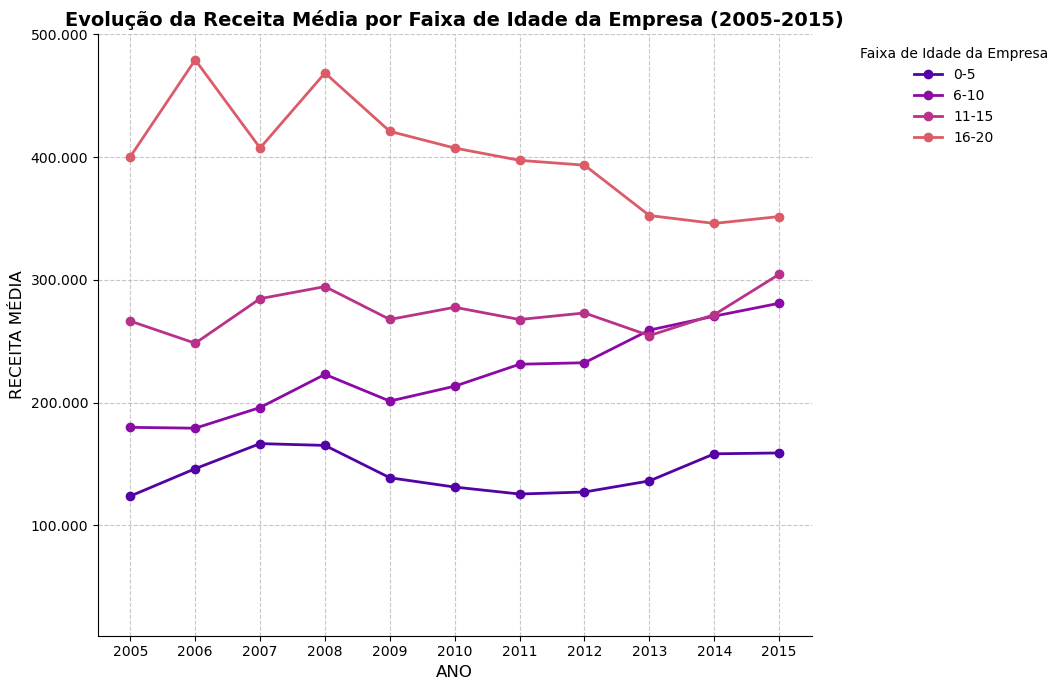

In [28]:
# Step 2: Define company age groups
bins_company_age = [0, 5, 10, 15, 20]
labels_company_age = ['0-5', '6-10', '11-15', '16-20']
df_years['company_age_group'] = pd.cut(df_years['company_age'], bins=bins_company_age, labels=labels_company_age, right=True, include_lowest=True)
print("\nDataframe com faixas de idade da empresa:\n", df_years)

# Step 3: Group by year and company age group, then calculate the mean sales
grouped_data_sales = df_years.groupby(['year', 'company_age_group'])['sales'].mean().unstack()
print("\ngrouped_data_sales (mean sales):\n", grouped_data_sales)

# Step 4: Prepare data for the line plot
if grouped_data_sales.empty:
    print("Erro: grouped_data_sales está vazio. Não há dados para plotar.")
else:
    years = grouped_data_sales.index
    company_age_groups = grouped_data_sales.columns
    print("\nAnos (Eixo X):", years)
    print("Faixas de Idade da Empresa (Legenda):", company_age_groups)

    # Step 5: Create the line plot
    sns.set_palette("plasma")  # Define a paleta de cores
    plt.figure(figsize=(12, 7))
    for i, age_group in enumerate(company_age_groups):
        plt.plot(years, grouped_data_sales[age_group], marker='o', linewidth=2, label=age_group)

    # Adiciona um título mais informativo e centralizado
    plt.title('Evolução da Receita Média por Faixa de Idade da Empresa (2005-2015)', fontsize=14, fontweight='bold')
    plt.xlabel('ANO', fontsize=12)
    plt.ylabel('RECEITA MÉDIA', fontsize=12)
    plt.xticks(years, fontsize=10)
    plt.yticks(fontsize=10)
    plt.ylim(10000, 500000)  # Define os limites inferior e superior do eixo y
    plt.legend(title='Faixa de Idade da Empresa', bbox_to_anchor=(1.05, 1), loc='upper left', frameon=False) # Legenda à direita, fora do gráfico
    plt.grid(True, linestyle='--', alpha=0.7)
    sns.despine(left=False, bottom=False) # Mantém as bordas esquerda e inferior
    plt.tight_layout(rect=[0, 0, 0.9, 1]) # Ajusta o layout para acomodar a legenda à direita

    # Formatar os valores do eixo y com pontos como separadores de milhar
    def format_thousands(x, pos):
        return f'{x:,.0f}'.replace(',', '.')

    from matplotlib.ticker import FuncFormatter
    formatter = FuncFormatter(format_thousands)
    plt.gca().yaxis.set_major_formatter(formatter)

    plt.show()
